# Test Gridworld Environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from grid_world_environment import GridWorldEnvironment
from montecarloAgent import MontecarloAgent

from IPython.display import clear_output

np.random.seed(42)

## Constants

In [6]:
MALFUNCTION_PROBABILITY = 0.2
EPSILON = 0.5
MIN_EPSILON = 0.1
DELAY = 0.001
DISCOUNT_FACTOR = 1

## Movement function

In [4]:
def animate_robot_movement(env: GridWorldEnvironment, agent: MontecarloAgent, delay=0.5):
    # Continue until the target is reached
    while env.position != env.target:
        # Display the current state of the environment
        env.display()
        
        # Get the best action for the current state
        action = agent.get_epsilon_greedy_action(env.position)
        
        # Take a step in the environment
        next_state, reward = env.step(action)
        
        # Wait for a moment
        time.sleep(delay)
        
        # Clear the output
        clear_output(wait=True)
    
    # Display the final state
    env.display()
    print("Target reached!")

## Initialize environment

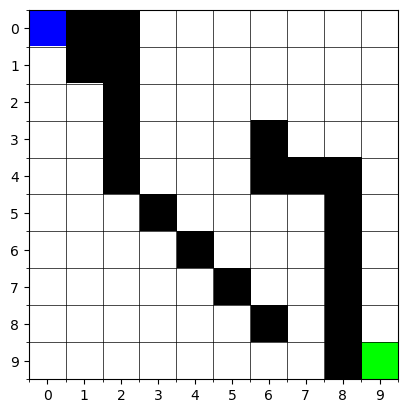

In [5]:
size = (10, 10)
obstacles = [(0,1), (0,2), (1, 1), (1,2), (2,2), (3,2), (4,2), (5,3), (6,4), (7,5), (8,6), (4,6), (3,6), (9,8), (8,8), (7,8), (6,8), (5,8), (4,8), (4,7)]
position = (0, 0)
target = (9, 9)

env = GridWorldEnvironment(size=size,
                          obstacles=obstacles,
                          position=position,
                          target=target,
                          malfunction_probability=MALFUNCTION_PROBABILITY)
env.display()

## 500 training episodes

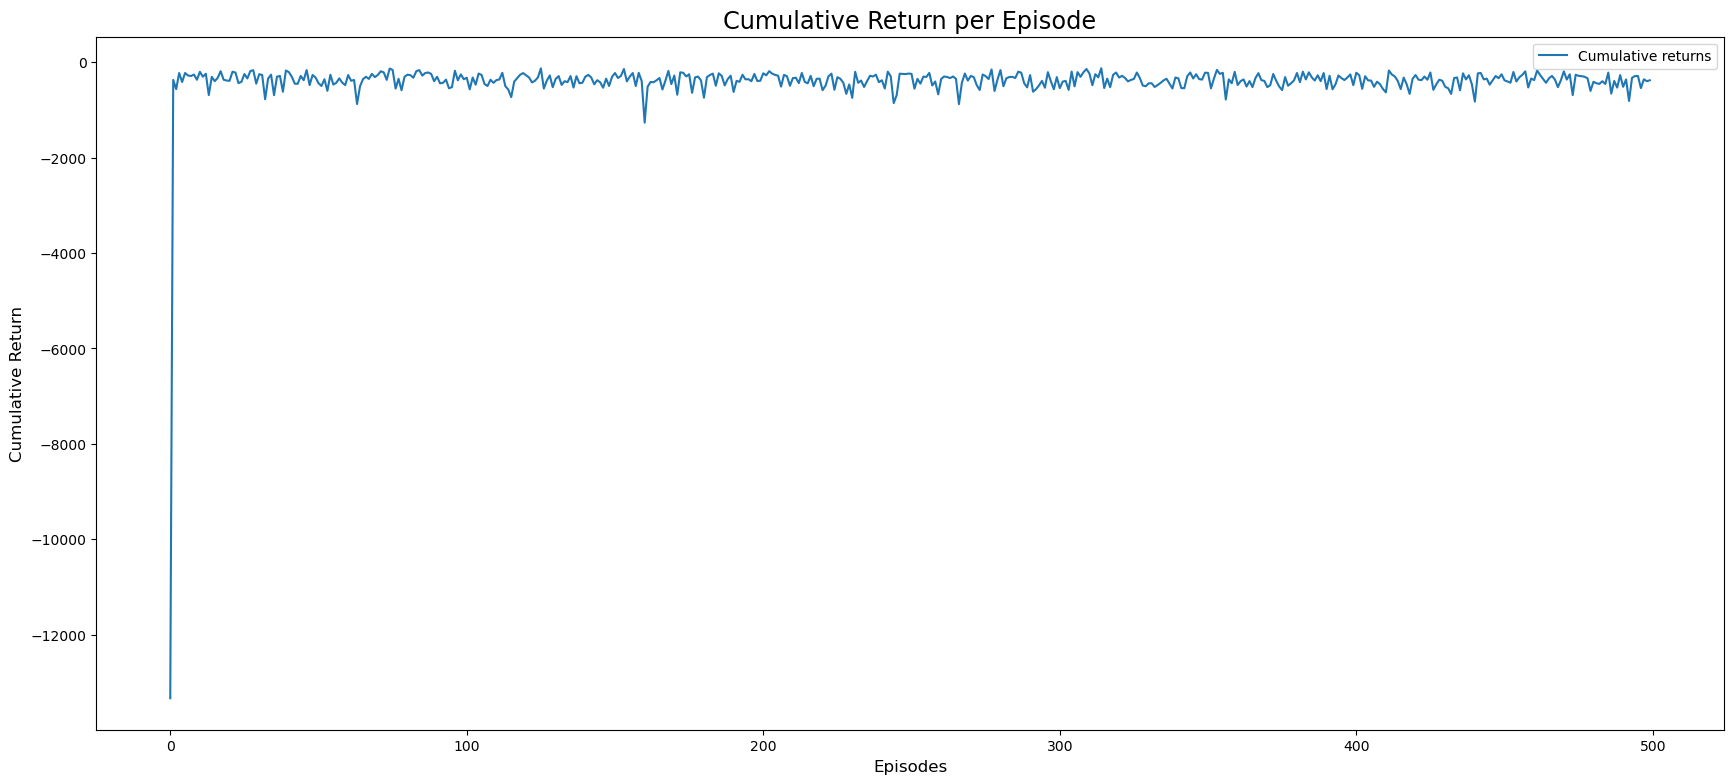

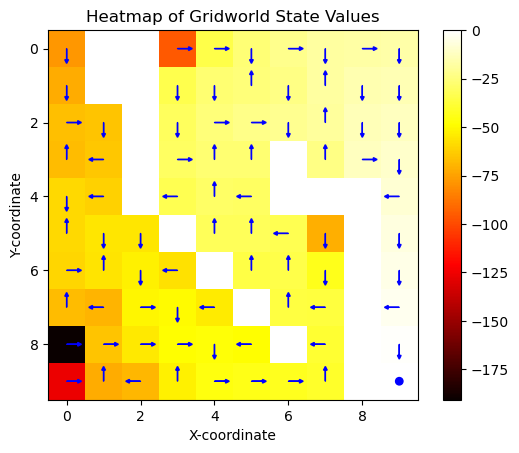

In [8]:
env.reset()
training_episodes = 500
plot_frequency = 10
mc_agent = MontecarloAgent(env, discount_factor=DISCOUNT_FACTOR, epsilon=EPSILON, min_epsilon=MIN_EPSILON)
mc_agent.train(n_episodes=training_episodes, plot=True, plot_frequency=plot_frequency)
mc_agent.plot_value_table()

## 1000 training episodes

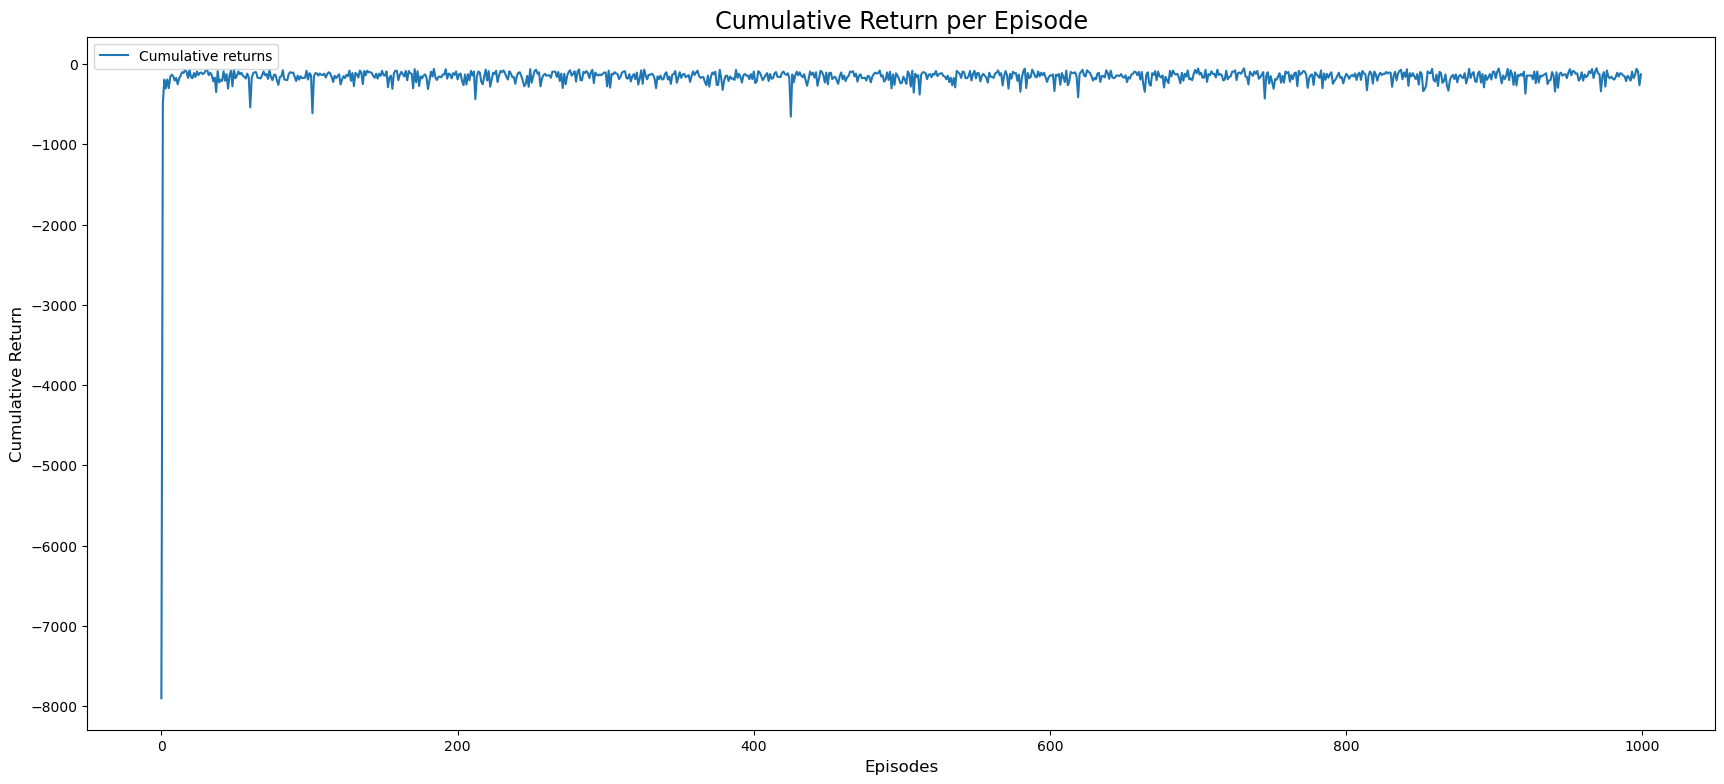

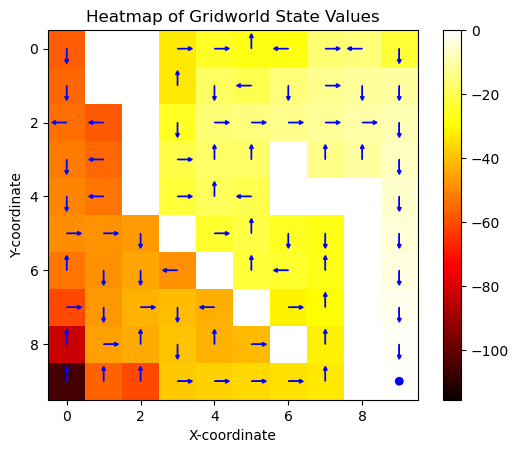

In [9]:
env.reset()
training_episodes = 1000
plot_frequency = 50
mc_agent = MontecarloAgent(env, discount_factor=DISCOUNT_FACTOR, epsilon=EPSILON, min_epsilon=MIN_EPSILON)
mc_agent.train(n_episodes=training_episodes, plot=True, plot_frequency=plot_frequency)
mc_agent.plot_value_table()

## 5000 training episodes

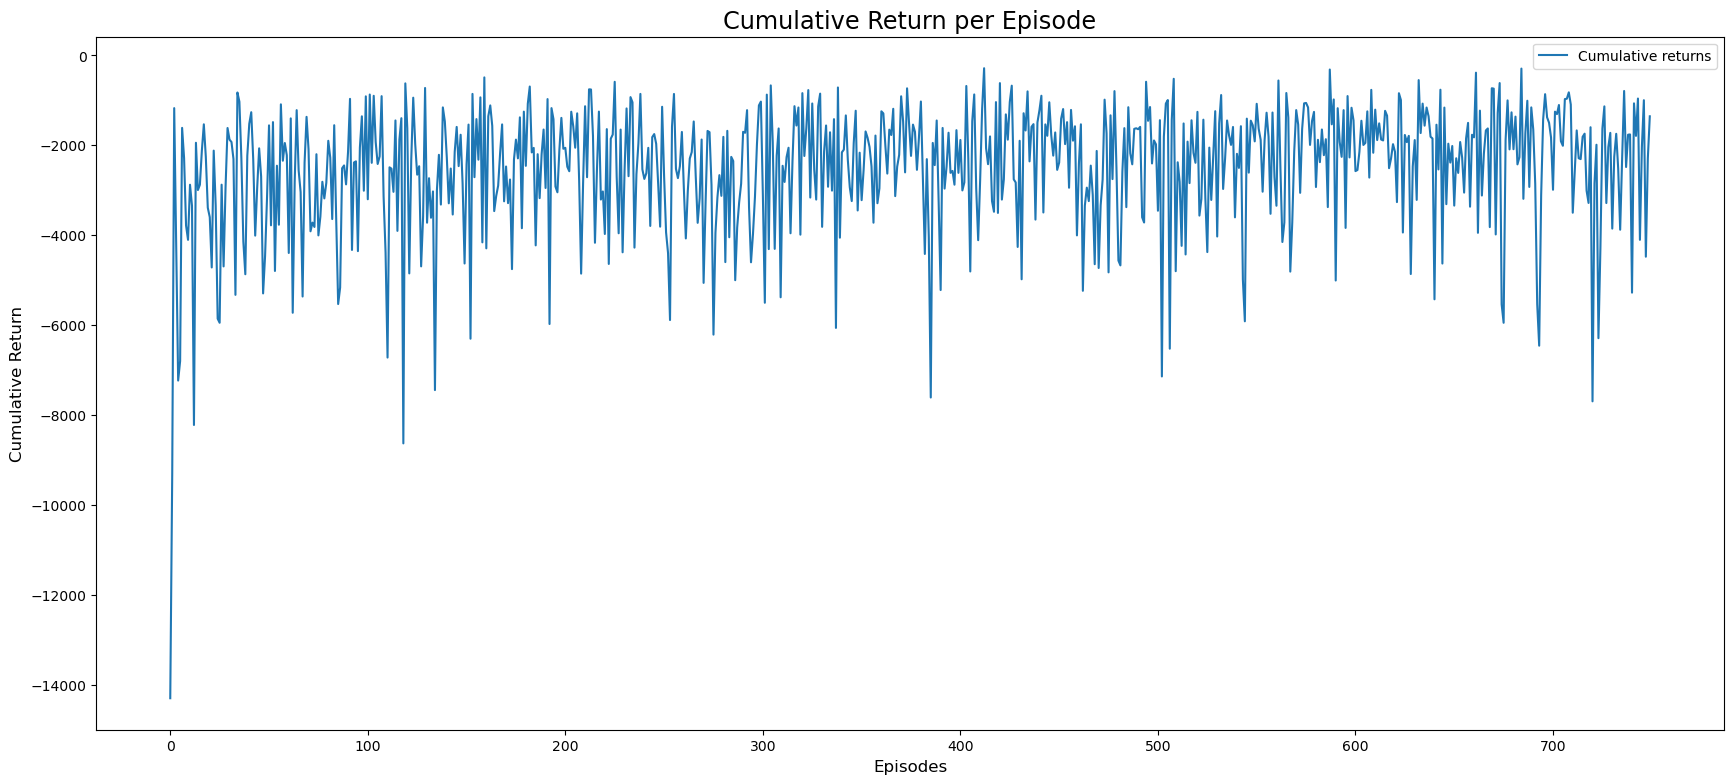

KeyboardInterrupt: 

In [10]:
env.reset()
training_episodes = 5000
plot_frequency = 50
mc_agent = MontecarloAgent(env, discount_factor=DISCOUNT_FACTOR, epsilon=EPSILON, min_epsilon=MIN_EPSILON)
mc_agent.train(n_episodes=training_episodes, plot=True, plot_frequency=plot_frequency)
mc_agent.plot_value_table()